<a href="https://colab.research.google.com/github/treasure823/Credit_Card_Default_Prediction_Nidhi_Pandey/blob/main/Credit_Card_Default_Prediction_Nidhi_Pandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**   NIDHI PANDEY


# **Project Summary -**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card paymentsThe financial institution considers issuing the client a credit card, the institution needs to
check the payment history of that person because the decision on whether to pay on due
or owe the bill on a specific month usually relates to the previous payment history. For
instance, if a person owes numerous bills already, he or she is likely to delay the payment
of the current month unless this person gets a windfall so that the total arrears can be
paid off. Besides the payment history, it is also imperative to look at the applicants’ credit
limit of their current credit cards. This is a result of a virtuous circle: people who pay on
duly tend to have better credit scores, so the banks prefer to increase these people’s
credit lines by taking less risk. As a result, if a potential client already has a credit card
with a high credit limit line, this person is unlikely to fail to pay the full amount owed in
the future. Although the financial institution often collects clients’ personal information
such as age, educational level, and marital status when people apply for credit cards, this
information also affects the default behavior. In other words, the financial institution
should equally consider their potential clients who are men or women, obtain bachelor
degrees or master degrees, single or married when deciding whether to approve their
credit card/loan applications. We tried our best to make a thorough analysis, and there
are still a few possible improvements that may require longer-term action. We tried to
implement several models such as logistic regression, Support vector Classifier, Random
Forest, XGBoost, but various variants of boosting techniques may also be utilized in the
future. The financial market changes rapidly every day, and people’s economic status and
performance are affected by the market all the time.

# **GitHub Link -**

https://github.com/treasure823/Credit_Card_Default_Prediction_Nidhi_Pandey

# **Problem Statement**


**This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
%matplotlib inline

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Laoding the dataset
df = pd.read_excel('/content/drive/MyDrive/Credit_Card_Default_Prediction_Nidhi_Pandey/default of credit card clients.xls',header = 1)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(30000, 25)

In [ ]:
df.columns.value_counts()

ID                            1
BILL_AMT2                     1
PAY_AMT6                      1
PAY_AMT5                      1
PAY_AMT4                      1
PAY_AMT3                      1
PAY_AMT2                      1
PAY_AMT1                      1
BILL_AMT6                     1
BILL_AMT5                     1
BILL_AMT4                     1
BILL_AMT3                     1
BILL_AMT1                     1
LIMIT_BAL                     1
PAY_6                         1
PAY_5                         1
PAY_4                         1
PAY_3                         1
PAY_2                         1
PAY_0                         1
AGE                           1
MARRIAGE                      1
EDUCATION                     1
SEX                           1
default payment next month    1
dtype: int64

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [ ]:
duplicates = len(df[df.duplicated()])
print(duplicates)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.notnull().count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

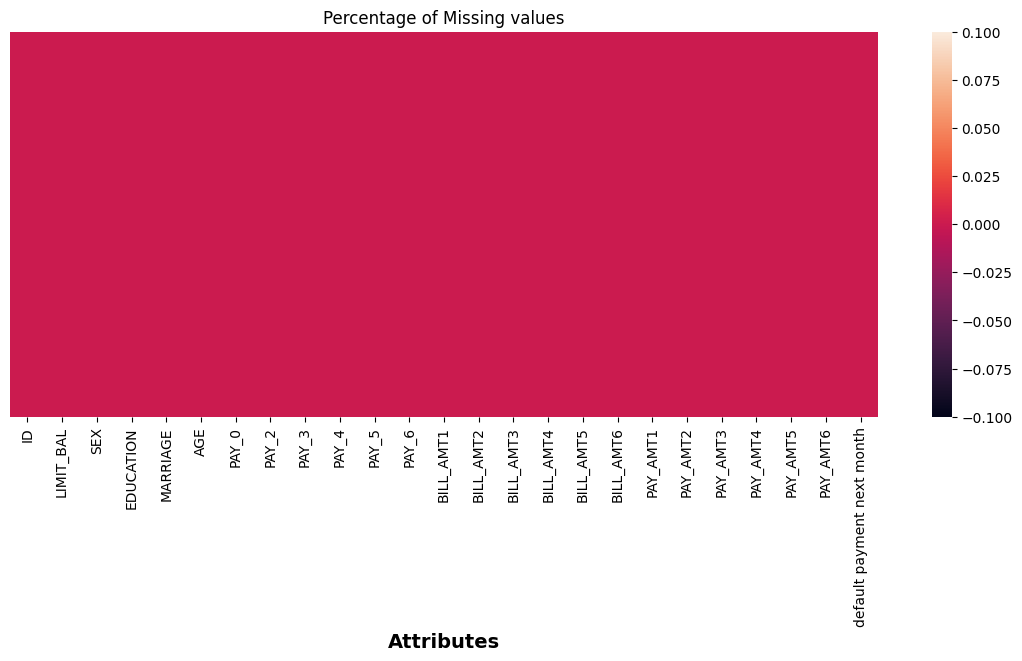

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

<Axes: >

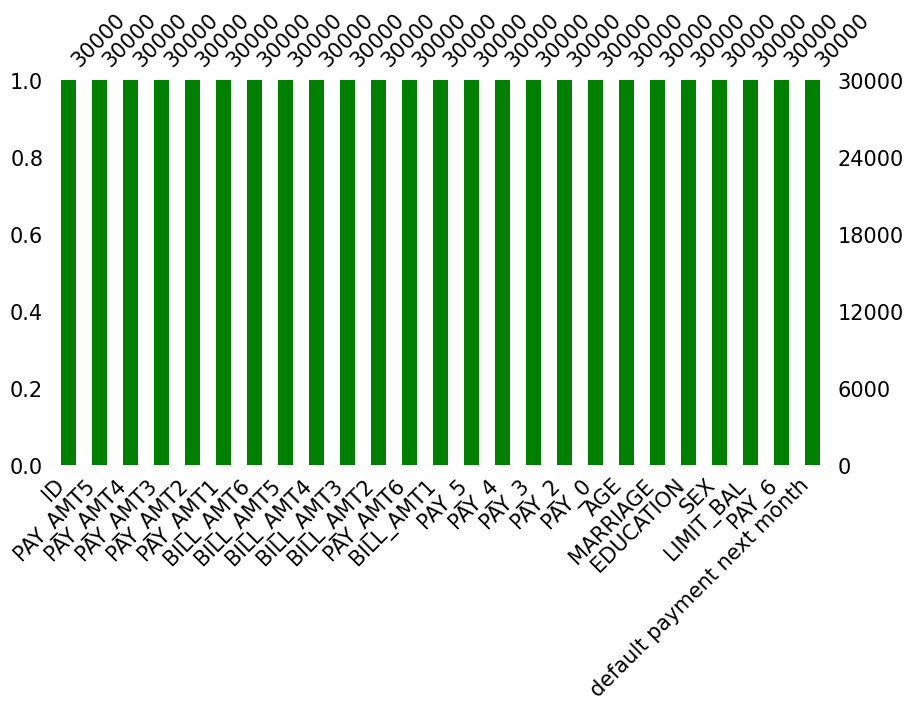

In [ ]:
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,5), fontsize=15)

### What did you know about your dataset?

**No missing or null values or duplicates are found in our dataset.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* X2: Gender (1 = male; 2 = female).

* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* X4: Marital status (1 = married; 2 = single; 3 = others).

* X5: Age (year).

* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
df.ID.unique()

array([    1,     2,     3, ..., 29998, 29999, 30000])

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

In [ ]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
df.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEPT,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### What all manipulations have you done and insights you found?

I have rename all the columns and then describe all the columns again with their new name .The insights we got from the above data is shown  in the above describe table.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='AGE', ylabel='MARRIAGE'>

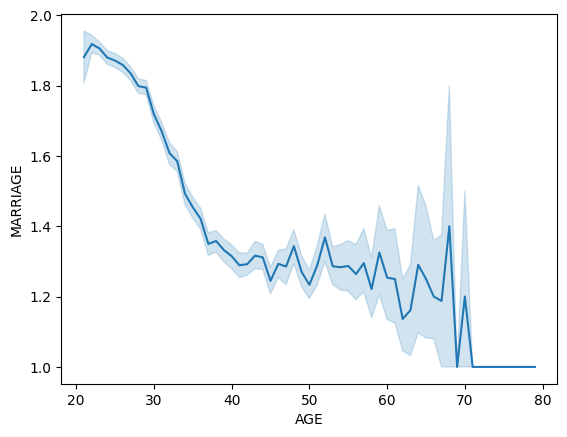

In [ ]:
# Chart - 1 visualization code
sns.lineplot(data = df , x= 'AGE',  y = 'MARRIAGE')

##### 1. Why did you pick the specific chart?

**Python line charts are visual displays of data in which the datapoints are linked by lines. Line charts are frequently used to show sequential values that aid in trend identification.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the marriages are performed   between the age of 20 t0  30**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**NO**

#### Chart - 2

<Axes: xlabel='BILL_AMT_SEPT', ylabel='PAY_AMT_SEPT'>

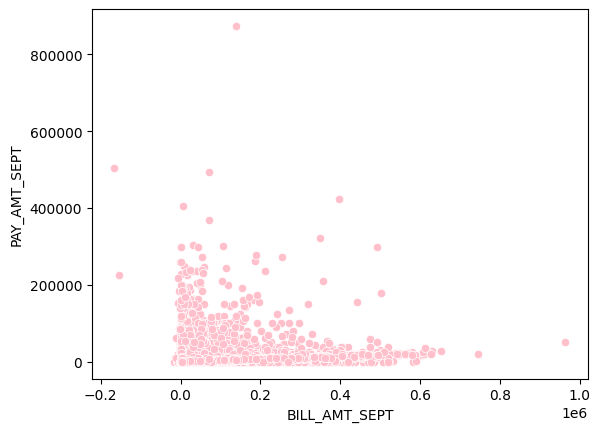

In [ ]:
# Chart - 2 visualization code
sns.scatterplot( data= df , x ='BILL_AMT_SEPT', y= 'PAY_AMT_SEPT', color = 'pink')

##### 1. Why did you pick the specific chart?

**The main purposes of scatter plots are to examine and display correlations between two numerical variables. When the data are viewed as a whole, the patterns shown by the dots in a scatter plot are in addition to the values of the individual data points. With scatter plots, correlational link identification is prevalent.**

##### 2. What is/are the insight(s) found from the chart?

**The maximum amt in the payment bill is between 20000 to 40000.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 3

<Axes: xlabel='PAY_APR', ylabel='count'>

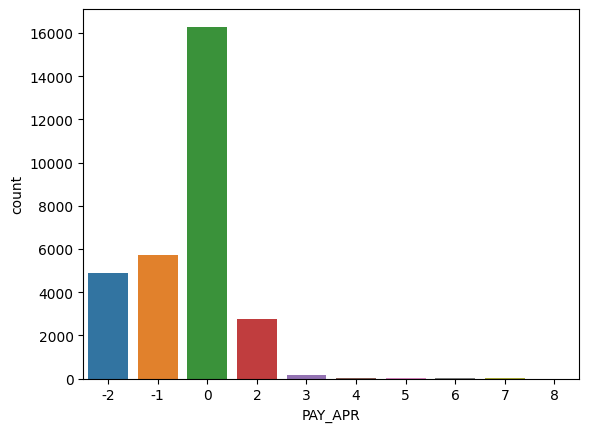

In [ ]:
# Chart - 3 visualization code
sns.countplot( data = df , x='PAY_APR')

In [ ]:
df['PAY_APR'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_APR, dtype: int64

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart.**

##### 2. What is/are the insight(s) found from the chart?

**The max count in 'pay_apr' is above 16000.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 4

<Axes: xlabel='PAY_APR', ylabel='BILL_AMT_APR'>

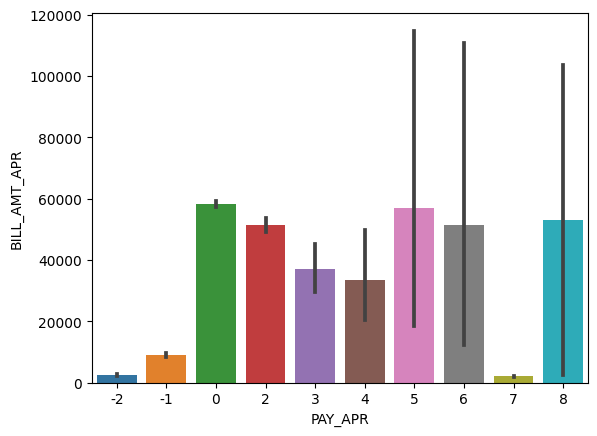

In [ ]:
# Chart - 4 visualization code
sns.barplot( data = df , x='PAY_APR',y='BILL_AMT_APR')

##### 1. Why did you pick the specific chart?

 **I have used bar graph for the better specification of the data .**

##### 2. What is/are the insight(s) found from the chart?

**Bill amount is between 40000 to 60000**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**NO**

#### Chart - 5

<Axes: xlabel='default payment next month', ylabel='count'>

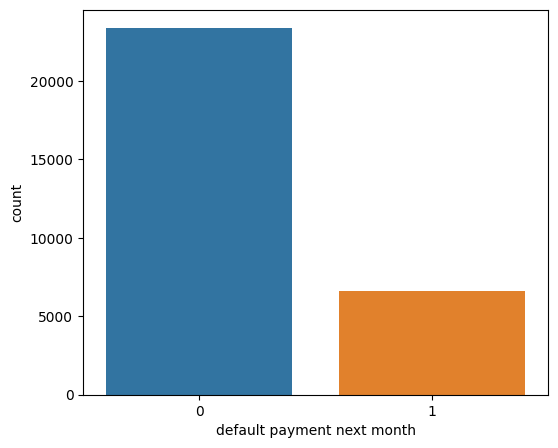

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,5))
sns.countplot(x = 'default payment next month', data = df)

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

Here,

`0 - Not Default`

`1 - Default`

so we can conclude that, Defaulters are less as compare to the Non-Defaulters in the given dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No there is no  negative growth can be seen from the given data .**

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

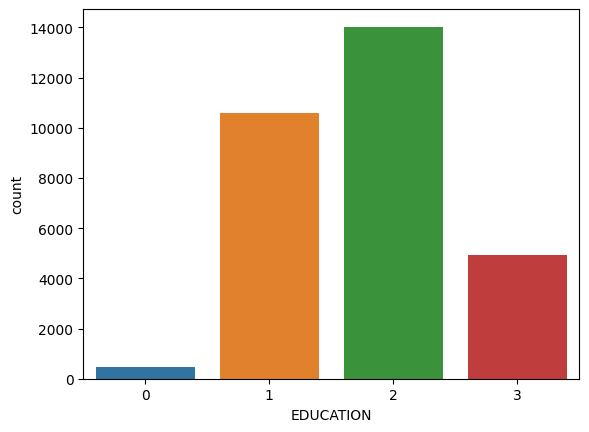

In [ ]:
sns.countplot(data= df , x='EDUCATION')

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

**The max no. education count is above 14000**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

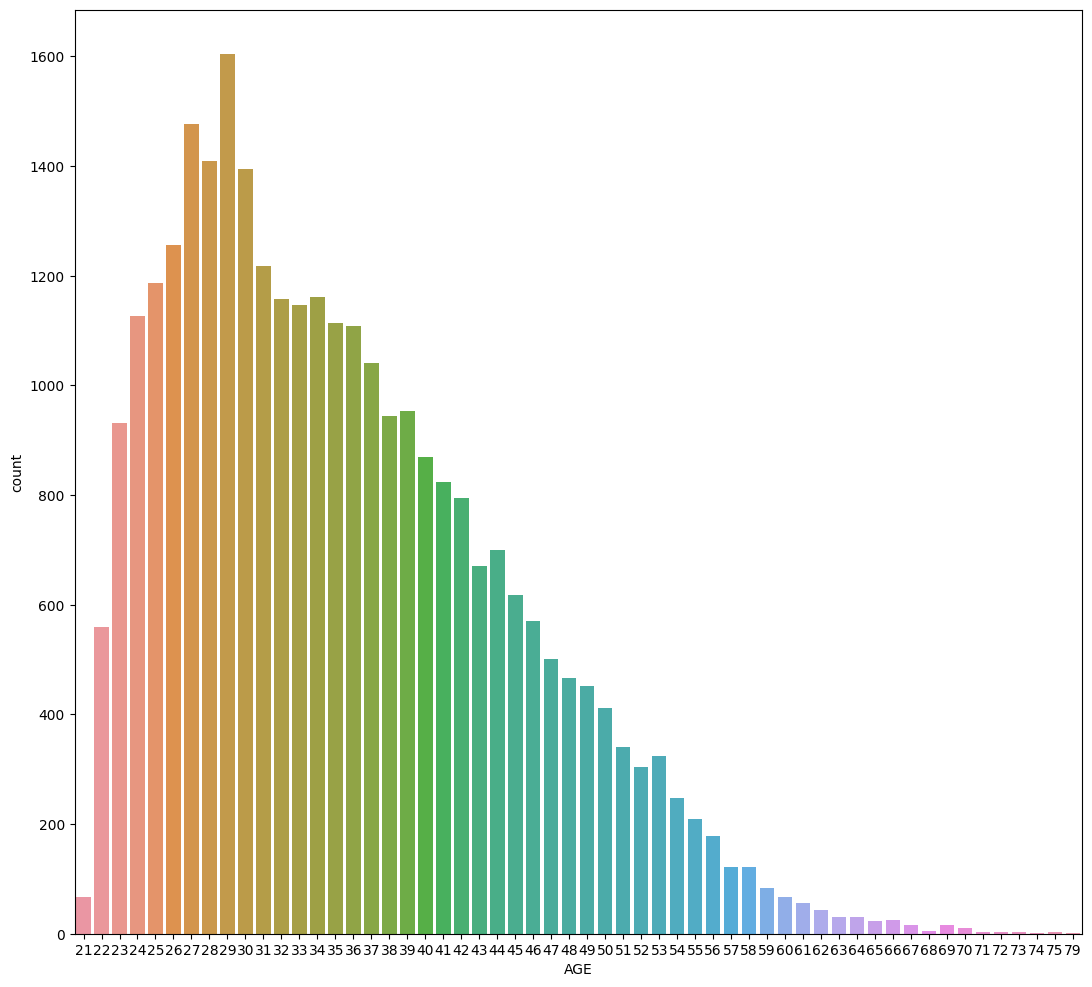

In [ ]:
plt.figure(figsize=(13,12))
sns.countplot(data= df , x='AGE')
plt.show()

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

**The max age of pepople is lying between 24 to 30 **

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

<Axes: xlabel='MARRIAGE', ylabel='count'>

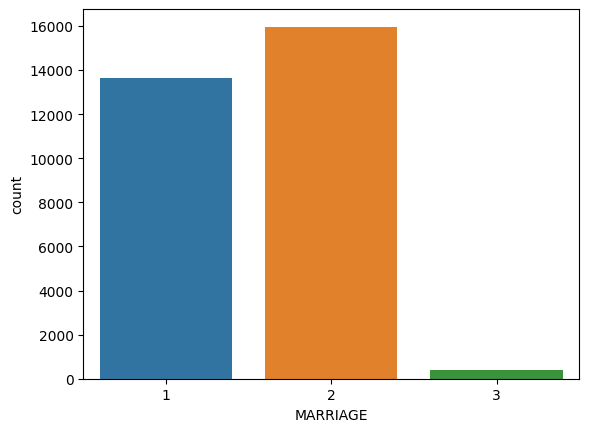

In [ ]:
sns.countplot(data =df , x = 'MARRIAGE')

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

**More than 16000 people are married .**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
df['LIMIT_BAL'].shape

(30000,)

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

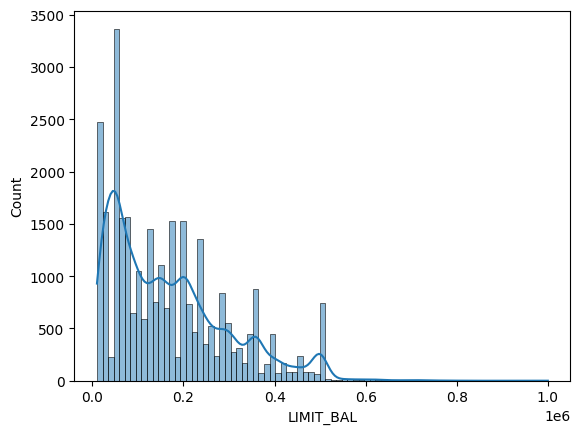

In [ ]:
sns.histplot(df['LIMIT_BAL'], kde = True)

##### 1. Why did you pick the specific chart?

**One common graphing tool is the histogram. It is employed to present interval-scaled summaries of discrete or continuous data. It is frequently used to depict the key characteristics of the data distribution in an easy-to-read format.**

##### 2. What is/are the insight(s) found from the chart?

**"LIMIT_BAL" lies between 2500 to 3500**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 10

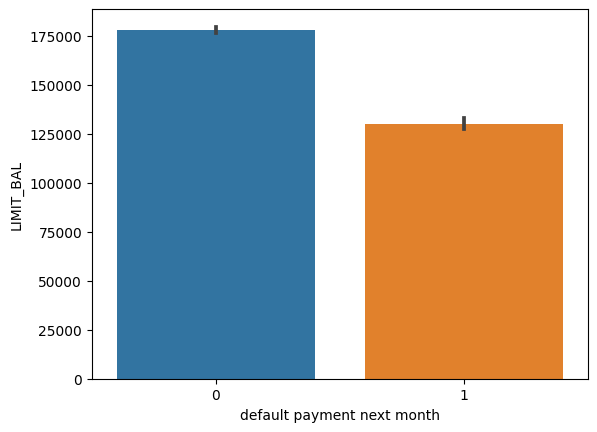

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Chart - 10 visualization code
sns.barplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.figure(figsize=(10,8))
plt.show()

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

**Default payment in next month is above 175000**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 11

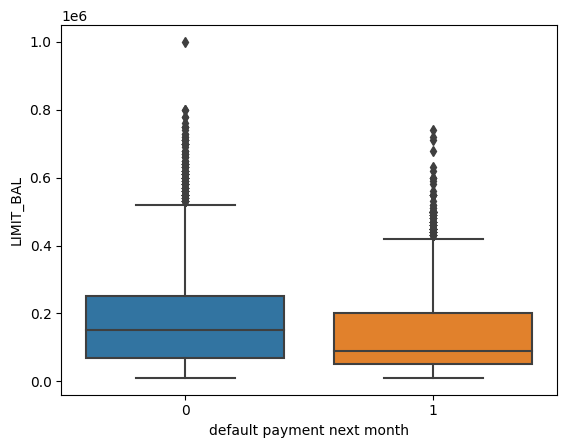

In [ ]:
# Chart - 11 visualization code
ax = sns.boxplot(x="default payment next month", y="LIMIT_BAL", data = df)

##### 1. Why did you pick the specific chart?

**A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.**

##### 2. What is/are the insight(s) found from the chart?

**The visualization of meadian is done by the use of the boxplot.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 12

<ipython-input-45-e78e5a924941>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MARRIAGE']==1] ['AGE'],color = 'green', label= 'MARRIAGE')
<ipython-input-45-e78e5a924941>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MARRIAGE']==0] ['AGE'],color = 'pink', label= 'NO MARRIAGE');

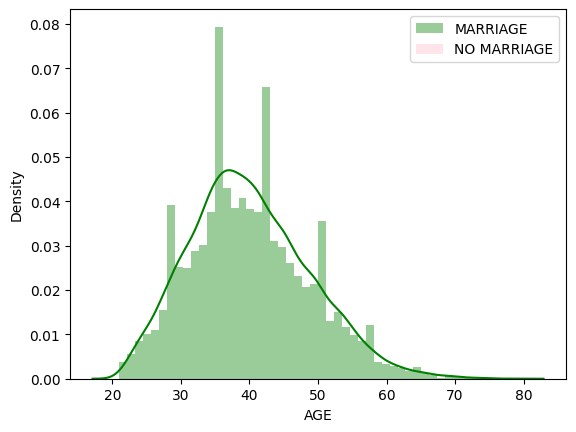

In [ ]:
# Chart - 12 visualization code
sns.distplot(df[df['MARRIAGE']==1] ['AGE'],color = 'green', label= 'MARRIAGE')
sns.distplot(df[df['MARRIAGE']==0] ['AGE'],color = 'pink', label= 'NO MARRIAGE');
plt.legend();

##### 1. Why did you pick the specific chart?

I have used distplot for comparing two values.

##### 2. What is/are the insight(s) found from the chart?

**THe mgraph shows the comparision between married and not married.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 13

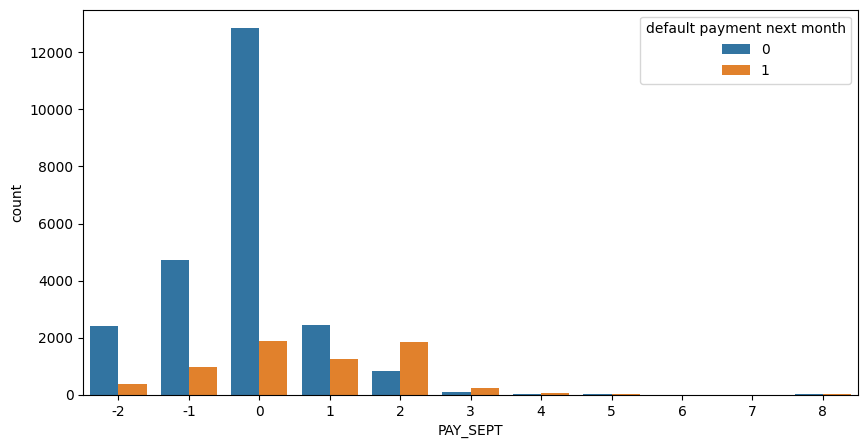

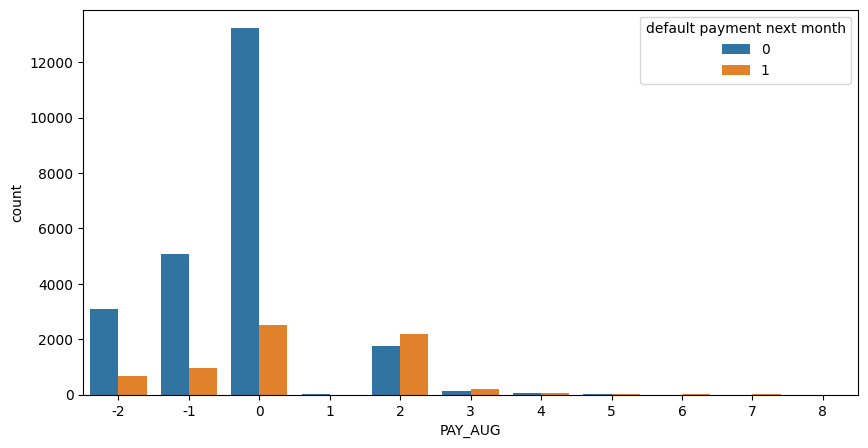

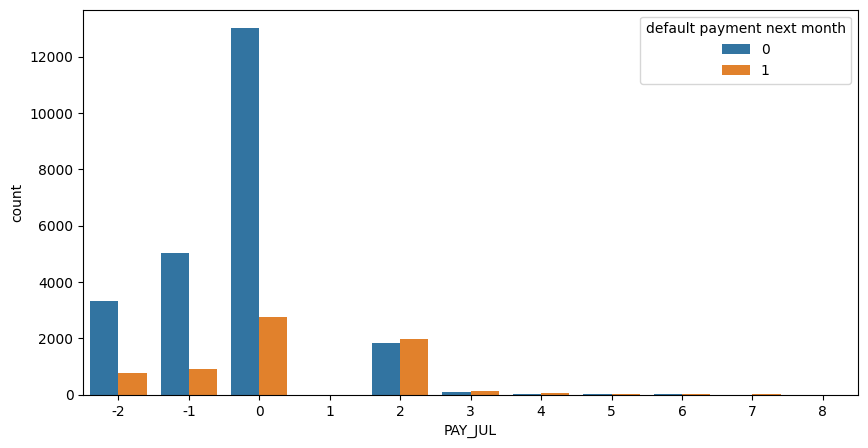

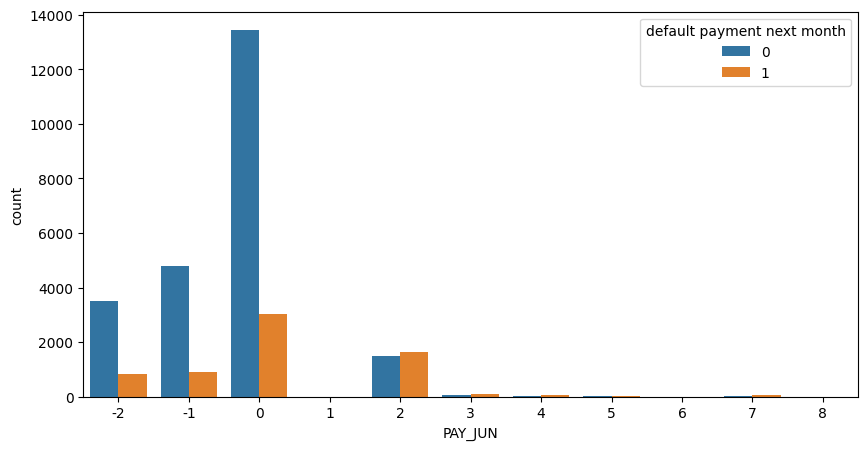

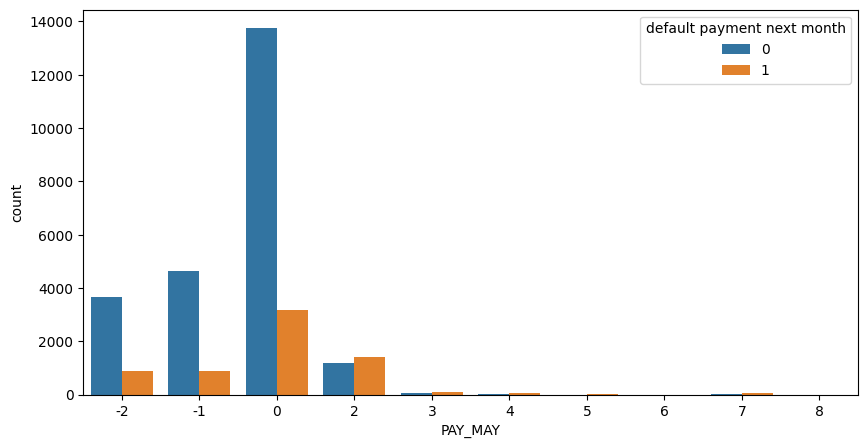

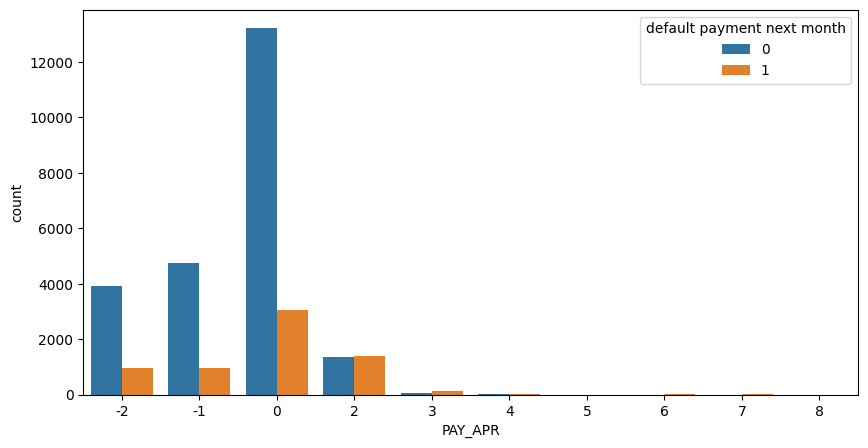

In [ ]:
# Chart - 13 visualization code
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default payment next month', data = df)

##### 1. Why did you pick the specific chart?

**The occurrence(counts) of the observation present in the categorical variable are represented using a countplot. For the visual representation, it makes use of the idea of a bar chart**

##### 2. What is/are the insight(s) found from the chart?

**The insights can be seen with the help of the 0 and 1 for the default payment next month.**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 14 - Correlation Heatmap

<Axes: >

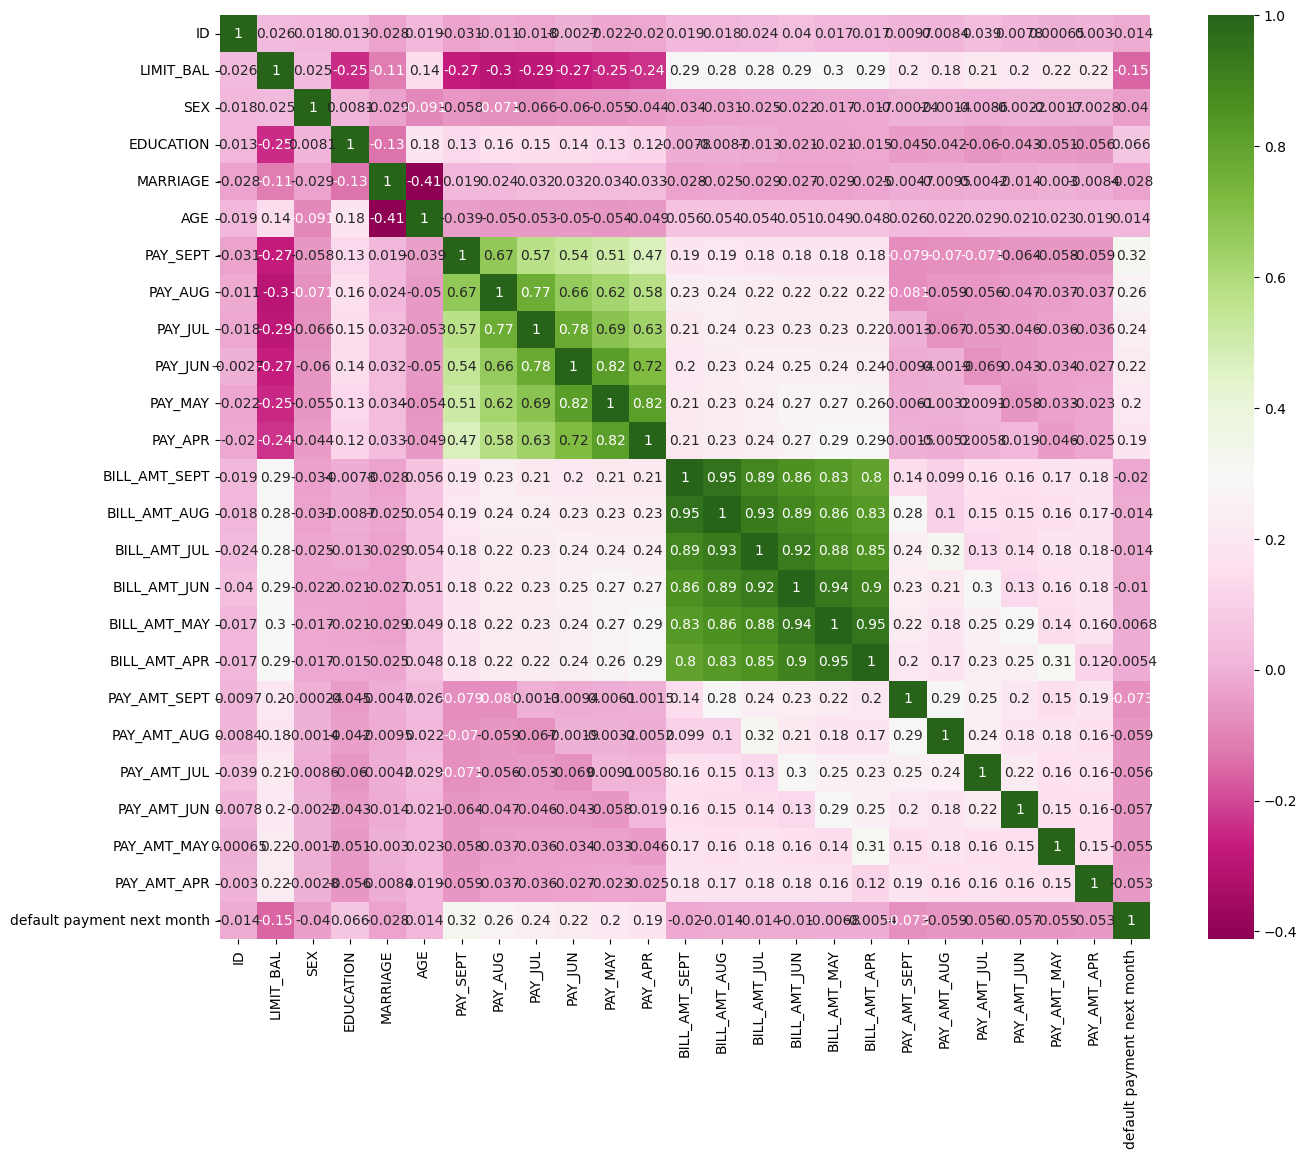

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [ ]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
# checking the highly correlated features
correlation(df, 0.9)          # setting threshold of 0.9

{'BILL_AMT_APR',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY'}

##### 1. Why did you pick the specific chart?

The strength and direction of the linear links between two sets of variables are evaluated using correlation coefficients. Calculating the pairwise correlation coefficients between two or more (numeric) variables is made simple by using a correlation matrix.

The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

##### 2. What is/are the insight(s) found from the chart?

{'BILL_AMT_APR',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY'} the correlation shown .

#### Chart - 15 - Pair Plot

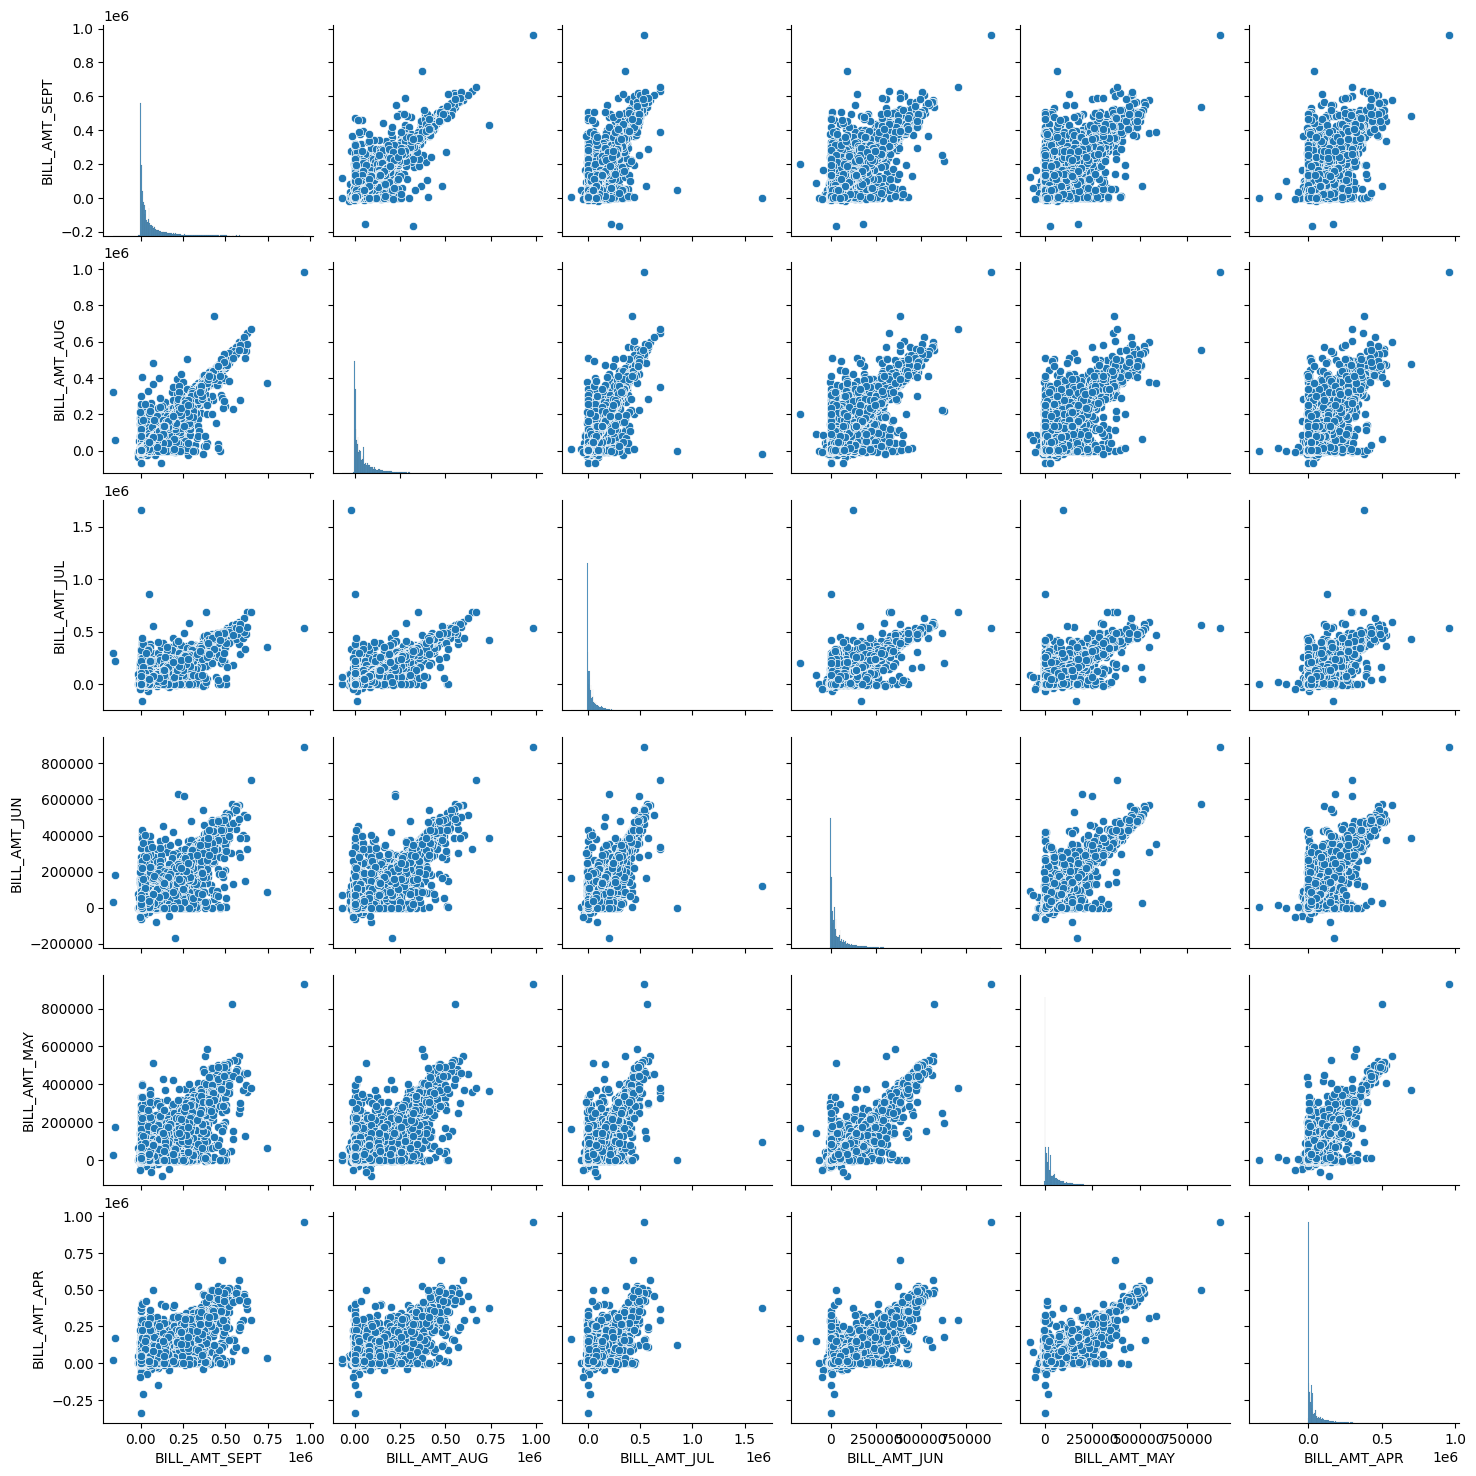

In [ ]:
# Pair Plot visualization code
bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = bill_amnt_df)

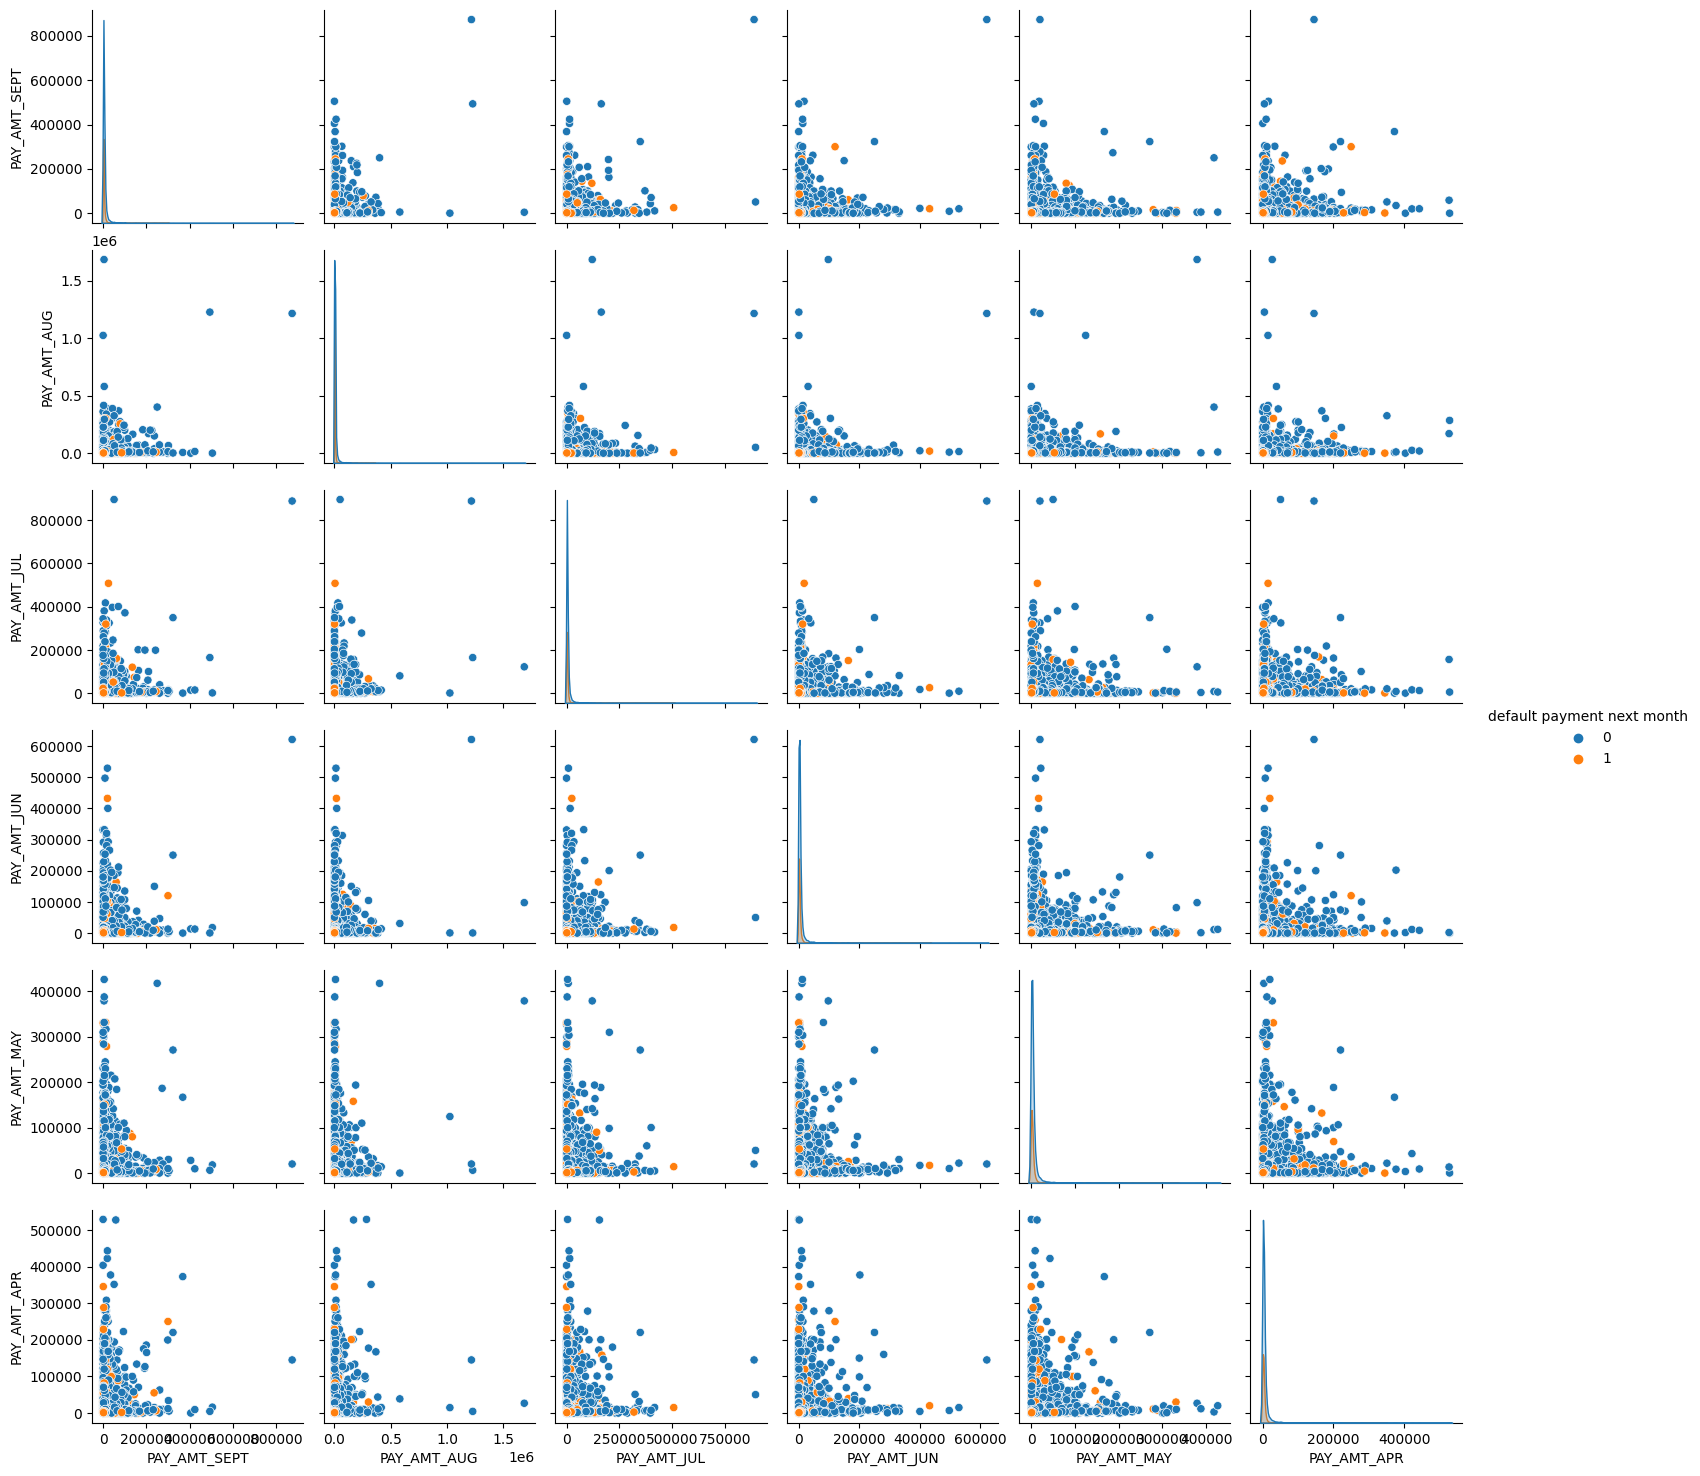

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default payment next month']]

sns.pairplot(data = pay_amnt_df, hue='default payment next month')

##### 1. Why did you pick the specific chart?


**Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.**

##### 2. What is/are the insight(s) found from the chart?

**Bill amt of each month is related with each other . And pay_amt of each month is related  to each other it can be seen through the pair plot.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis in Statistics**

Hypothesis is an assumption about a parameter in population.

**Null Hypothesis**

It assumes that the observation is not statistically significant.

**Alternate Hypothesis**

It assumes that the observations are due to some reason.

It's alternate to Null Hypothesis.

**Example:**

For an assessment of a student we would take:

"student is worse than average" - as a null hypothesis, and:

"student is better than average" - as an alternate hypothesis

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

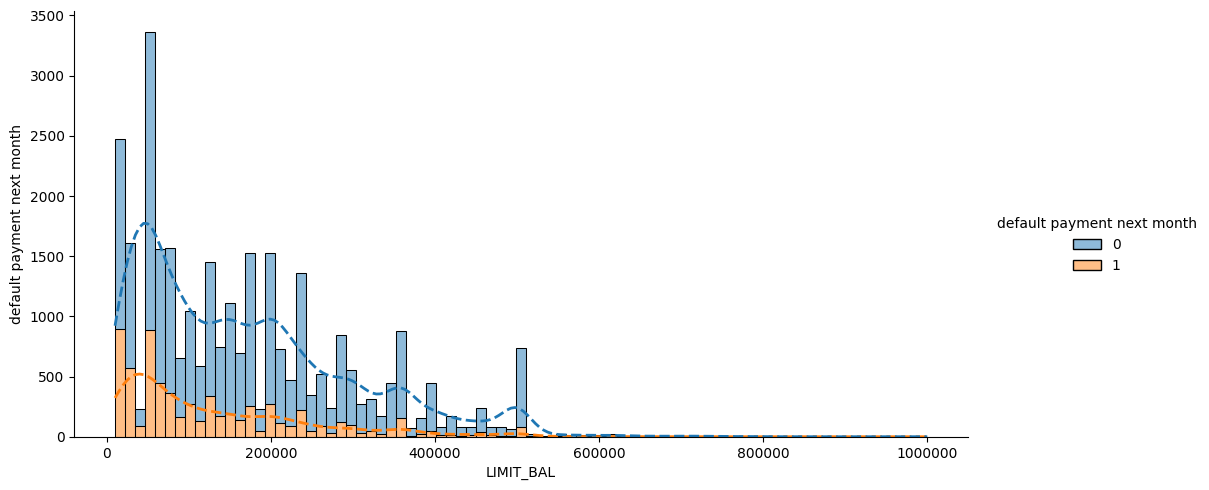

In [ ]:
# Perform Statistical Test to obtain P-Value
sns.displot(data=df, x="LIMIT_BAL", hue="default payment next month", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':2}, height=5, aspect=2). \
    set_axis_labels("LIMIT_BAL", "default payment next month")
plt.ticklabel_format(style="plain")

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

v1 = np.random.normal(size=100)
v2 = np.random.normal(size=100)

res = ttest_ind(v1, v2)

print(res)

TtestResult(statistic=-0.07902954879257681, pvalue=0.9370889332796016, df=198.0)


##### Which statistical test have you done to obtain P-Value?

**T-Test**

T-tests are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution.

It is a two tailed test.

The function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value

##### Why did you choose the specific statistical test?

T-tests are used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution. They also provide most efficient result.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import kstest

v = np.random.normal(size=100)

res = kstest(v, 'norm')

print(res)

KstestResult(statistic=0.08453239361312176, pvalue=0.44802384306301646, statistic_location=-0.23921971922175686, statistic_sign=1)


##### Which statistical test have you done to obtain P-Value?

KS test is used to check if given values follow a distribution.

The function takes the value to be tested, and the CDF as two parameters.

##### Why did you choose the specific statistical test?

**For more efficient result.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-2.614271347363747, 2.535602888867539), mean=-0.18728289878140425, variance=1.1398831040596598, skewness=-0.020406546690025434, kurtosis=-0.2407591863590417)


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

-0.1793725876951926
-0.5125579351966572


In [ ]:
import numpy as np
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v))

NormaltestResult(statistic=3.7816395868947885, pvalue=0.1509480119082893)


##### Which statistical test have you done to obtain P-Value?

**I have perform normality test**

##### Why did you choose the specific statistical test?

Normality tests are based on the skewness and kurtosis.

The normaltest() function returns p value for the null hypothesis:

"x comes from a normal distribution".

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())
print(df.shape)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
dtype: int64
(30000, 25)


In [ ]:
df.dropna(inplace= True)
print(df.isnull().sum())
print(df.shape)


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
dtype: int64
(30000, 25)


<Axes: >

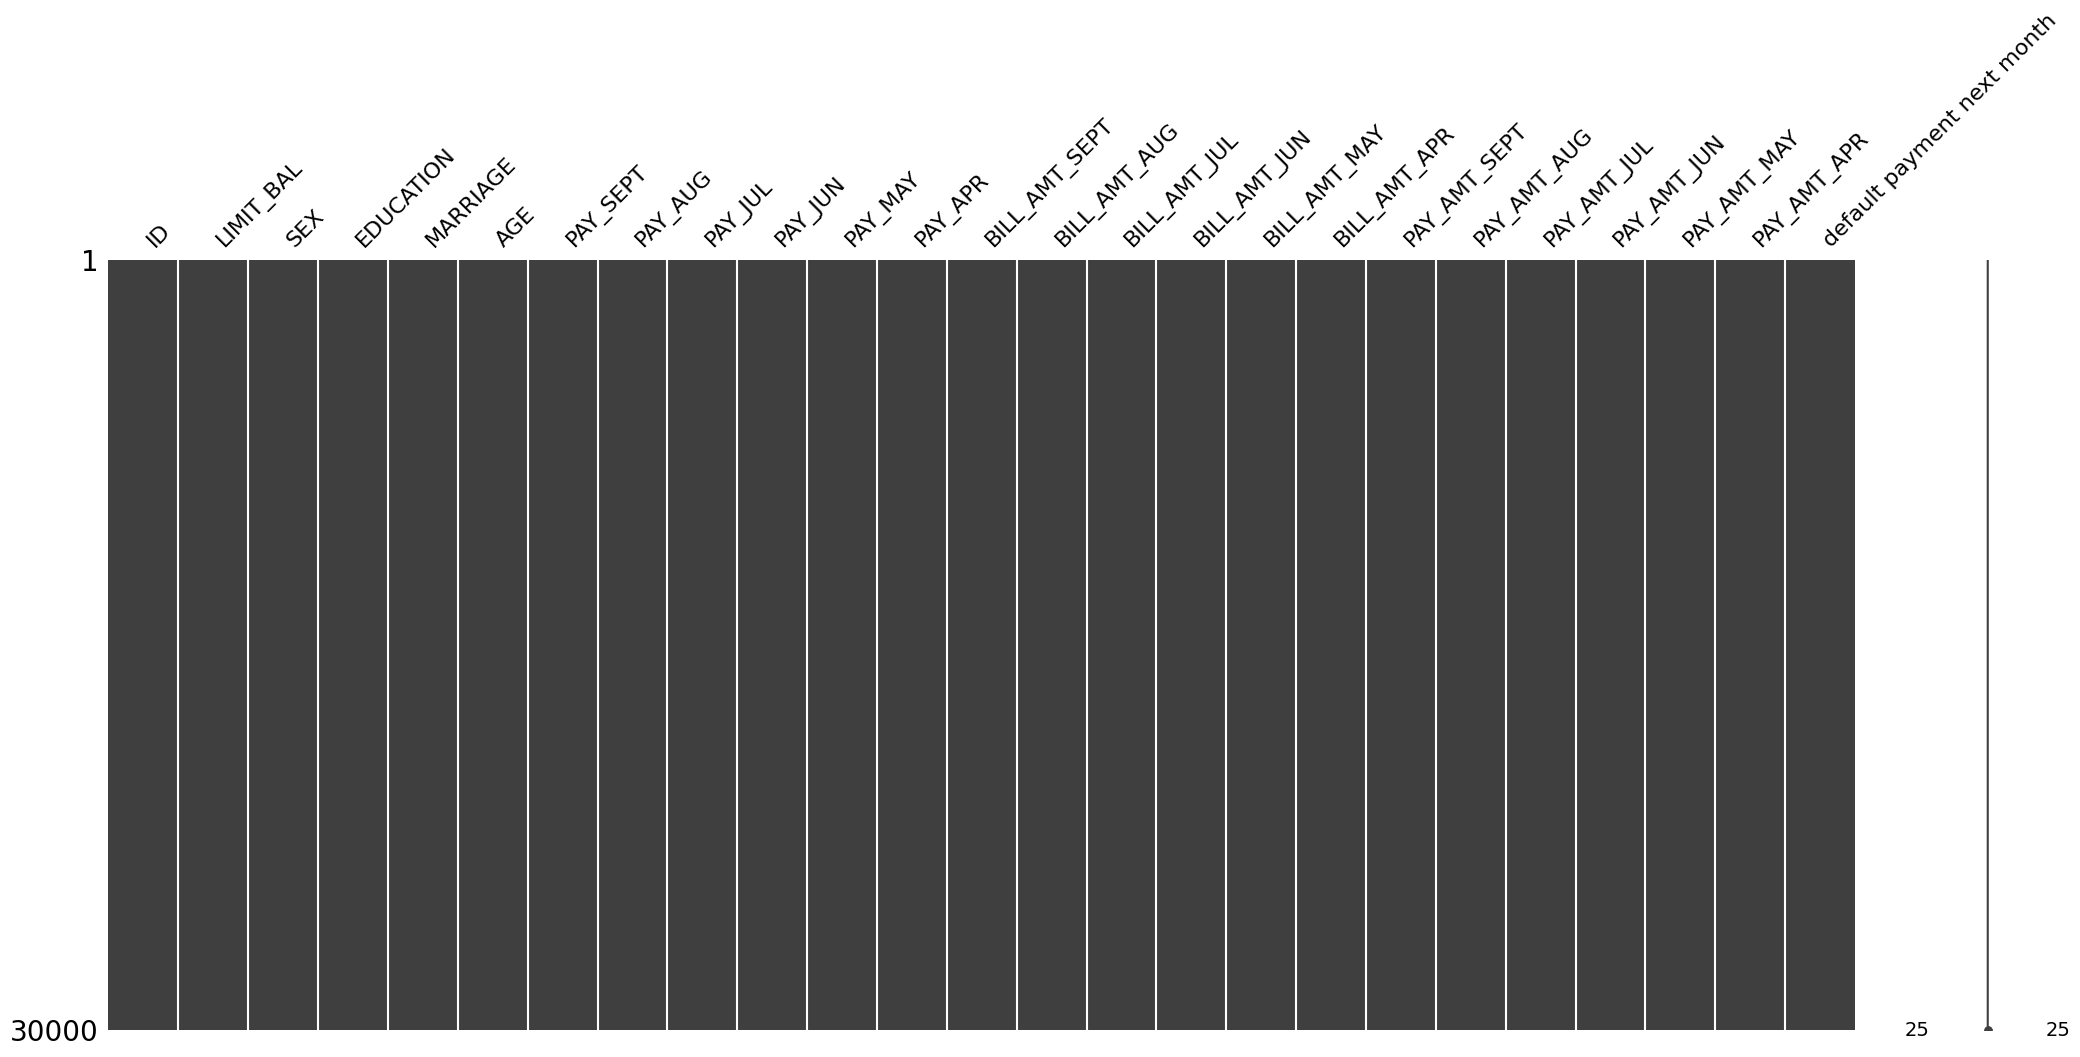

In [ ]:
msno.matrix(df)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
outliers = []
def Finding_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [ ]:
outliers = Finding_outliers(df['LIMIT_BAL'])

In [ ]:
len(outliers)

167

In [ ]:
median = np.median(df['LIMIT_BAL'])# Replace with median
for i in outliers:
    c = np.where(df['LIMIT_BAL']==i, median, df['LIMIT_BAL'])
print("New array: ",c)
#df['LIMIT_BAL']=c

New array:  [ 20000. 120000.  90000. ...  30000.  80000.  50000.]


<Axes: >

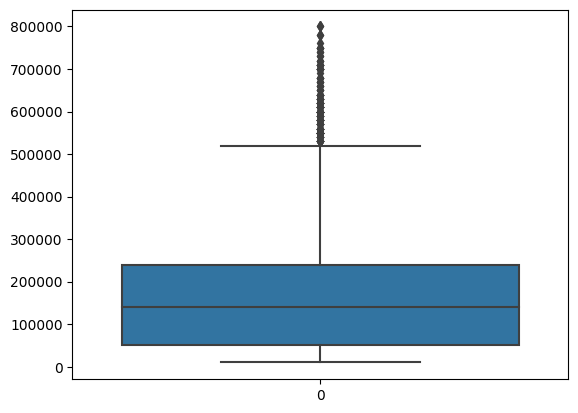

In [ ]:
sns.boxplot(c)

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
sample=df['LIMIT_BAL']
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

30000.0 360000.0
New array: [ 30000. 120000.  90000. ...  30000.  80000.  50000.]


In [ ]:
len(b)

30000

<Axes: >

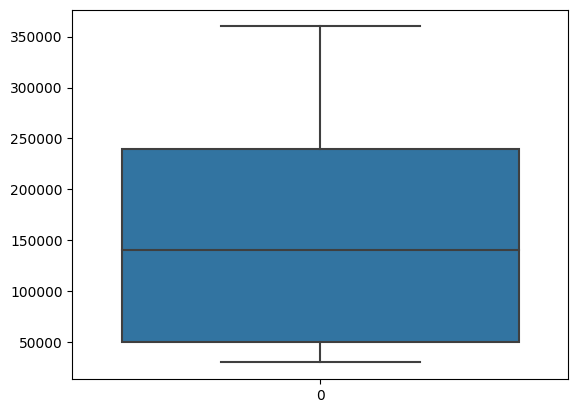

In [ ]:
sns.boxplot(b)

In [ ]:
# Considering option2 =>
df['LIMIT_BAL']=c
df['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

In [ ]:
df['Limit_bin'] = pd.cut(df['LIMIT_BAL'],bins=[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])

In [ ]:
df['Limit_bin'].value_counts()

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3903
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     205
Name: Limit_bin, dtype: int64

<ipython-input-73-82436cbe6191>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "Limit_bin", y = "default payment next month", data = df, palette = 'rocket_r', ci = None)


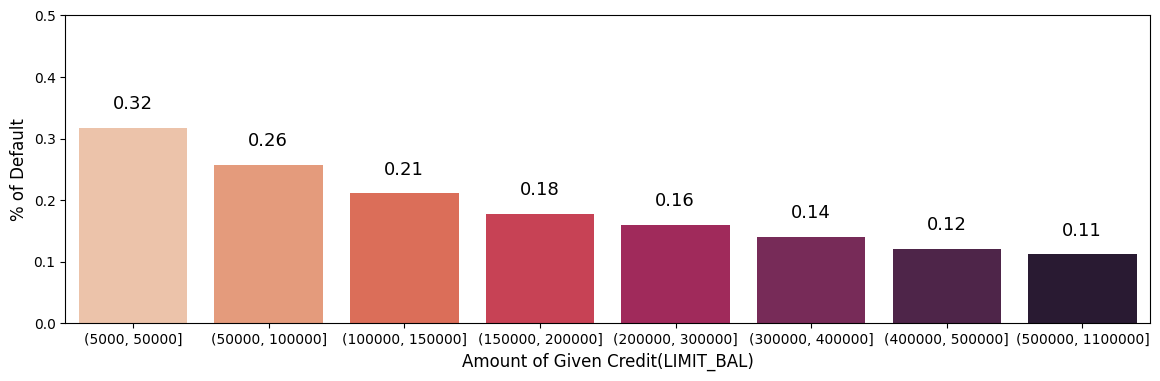

In [ ]:
plt.figure(figsize=(14,4))
ax = sns.barplot(x = "Limit_bin", y = "default payment next month", data = df, palette = 'rocket_r', ci = None)
plt.xlabel("Amount of Given Credit(LIMIT_BAL)", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We can handle outliers in 3 methods.

Removing/deleting the outliers,
Replacing them with mean/median,
Quantile based flooring and capping.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df['MARRIAGE'].nunique()

3

In [ ]:
X_features=df.columns

In [ ]:
pd.get_dummies(df['MARRIAGE'])[0:5]

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
categorical_features=['AGE','EDUCATION','SEX']

In [ ]:
encoded_df=pd.get_dummies(df[X_features],columns = categorical_features,drop_first=True)

In [ ]:
encoded_df.columns

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default payment next month', 'Limit_bin',
       'AGE_22', 'AGE_23', 'AGE_24', 'AGE_25', 'AGE_26', 'AGE_27', 'AGE_28',
       'AGE_29', 'AGE_30', 'AGE_31', 'AGE_32', 'AGE_33', 'AGE_34', 'AGE_35',
       'AGE_36', 'AGE_37', 'AGE_38', 'AGE_39', 'AGE_40', 'AGE_41', 'AGE_42',
       'AGE_43', 'AGE_44', 'AGE_45', 'AGE_46', 'AGE_47', 'AGE_48', 'AGE_49',
       'AGE_50', 'AGE_51', 'AGE_52', 'AGE_53', 'AGE_54', 'AGE_55', 'AGE_56',
       'AGE_57', 'AGE_58', 'AGE_59', 'AGE_60', 'AGE_61', 'AGE_62', 'AGE_63',
       'AGE_64', 'AGE_65', 'AGE_66', 'AGE_67', 'AGE_68', 'AGE_69', 'AGE_70',
       'AGE_71', 'AGE_72', 'AGE_73', 'AGE_74', 'AGE_75', 'AGE_79',
       'EDUCATION_1', 'EDUCATI

In [ ]:
X_features=encoded_df.columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Qualitative variables orcategorical variables need to be encoded using dummy variables before incoprating in regression model.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.6 MB/s eta 0:00:00


In [ ]:
# import library
import contractions
# contracted text
text = '''Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables.
              By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.    '''

# creating an empty list
expanded_words = []
for word in text.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))

expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

Original text: Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables.
              By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.    
Expanded_text: Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Lower Casing
string = "CREDIT CARD DEFAULT PREDICTION !"
print(string.lower())

# string with numbers
# all alphabets should be lowercase
string = "CR3D!T CARD D3FAULT PR3DICT!ON!"
print(string.lower())

credit card default prediction !
cr3d!t card d3fault pr3dict!on!


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Remove Punctuations
# initializing string
test_str = "Credit, card : default  ! Prediction ;"

# printing original string
print("The original string is : " + test_str)

# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

# Removing punctuations in string
# Using loop + punctuation string
for ele in test_str:
    if ele in punc:
        test_str = test_str.replace(ele, "")

# printing result
print("The string after punctuation filter : " + test_str)

The original string is : Credit, card : default  ! Prediction ;
The string after punctuation filter : Credit card  default   Prediction 


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
t ="This is a text with a URL https://www.java2blog.com/ to remove."
s1 = re.sub('http://\S+|https://\S+', '', t)
print(s1)

This is a text with a URL  to remove.


#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# import regex
import re

# download stopwords
import nltk
nltk.download('stopwords')

# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# input string
string = "     This is a result of a virtuous circle: people who pay on duly tend to have better credit scores, so the banks prefer to increase these people’s credit lines by taking less risk."

# convert to lower case
lower_string = string.lower()

# remove numbers
no_number_string = re.sub(r'\d+','',lower_string)

# remove all punctuation except words and space
no_punc_string = re.sub(r'[^\w\s]','', no_number_string)

# remove white spaces
no_wspace_string = no_punc_string.strip()
no_wspace_string

# convert string to list of words
lst_string = [no_wspace_string][0].split()
print(lst_string)

# remove stopwords
no_stpwords_string=""
for i in lst_string:
    if not i in stop_words:
        no_stpwords_string += i+' '

# removing last space
no_stpwords_string = no_stpwords_string[:-1]

# output
print(no_stpwords_string)

['this', 'is', 'a', 'result', 'of', 'a', 'virtuous', 'circle', 'people', 'who', 'pay', 'on', 'duly', 'tend', 'to', 'have', 'better', 'credit', 'scores', 'so', 'the', 'banks', 'prefer', 'to', 'increase', 'these', 'peoples', 'credit', 'lines', 'by', 'taking', 'less', 'risk']
result virtuous circle people pay duly tend better credit scores banks prefer increase peoples credit lines taking less risk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### Which text normalization technique have you used and why?


**Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good. Because this technique gives more efficient result.**

#### 6. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
no_stpwords_string=""
for i in lst_string:
    if not i in stop_words:
        no_stpwords_string += i+' '
        # removing last space
no_stpwords_string = no_stpwords_string[:-1]

In [ ]:
# Remove White spaces
no_wspace_string = no_punc_string.strip()
no_wspace_string

'this is a result of a virtuous circle people who pay on duly tend to have better credit scores so the banks prefer to increase these peoples credit lines by taking less risk'

#### 7. Rephrase Text

In [ ]:
# Rephrase Text
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00


#### 8. Tokenization

In [ ]:
# Tokenization
text = """ This is a result of a virtuous circle: people who pay on duly tend to have better credit scores, so the banks prefer to increase these people’s credit lines by taking less risk.  """
data = text.split('.')
for i in data:
    print (i)


 This is a result of a virtuous circle: people who pay on duly tend to have better credit scores, so the banks prefer to increase these people’s credit lines by taking less risk
  


#### 9. Part of speech tagging

In [ ]:
# POS Taging
import spacy
nlp = spacy.load('en_core_web_sm')
sentence = "This is a result of a virtuous circle.\
 people who pay on duly tend to have better credit scores"
for token in nlp(sentence):
    print(f'{token.text:{10}} {token.tag_:>{10}}\t{spacy.explain(token.tag_):<{50}} {token.pos_:>{5}}')

This               DT	determiner                                          PRON
is                VBZ	verb, 3rd person singular present                    AUX
a                  DT	determiner                                           DET
result             NN	noun, singular or mass                              NOUN
of                 IN	conjunction, subordinating or preposition            ADP
a                  DT	determiner                                           DET
virtuous           JJ	adjective (English), other noun-modifier (Chinese)   ADJ
circle             NN	noun, singular or mass                              NOUN
.                   .	punctuation mark, sentence closer                  PUNCT
people            NNS	noun, plural                                        NOUN
who                WP	wh-pronoun, personal                                PRON
pay               VBP	verb, non-3rd person singular present               VERB
on                 IN	conjunction, subordinating or 

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer
import pprint
pp = pprint.PrettyPrinter(indent=4)
cv = CountVectorizer()
sentence = ['This is a result of a virtuous circle' , ' people who pay on duly tend to have better credit scores']
bow_rep = cv.fit_transform(sentence)

pp.pprint(cv.vocabulary_)

print("BoW representaion for {}:".format(sentence[0]),bow_rep[0].toarray())
print("BoW representaion for {}:".format(sentence[1]),bow_rep[1].toarray())

{   'better': 0,
    'circle': 1,
    'credit': 2,
    'duly': 3,
    'have': 4,
    'is': 5,
    'of': 6,
    'on': 7,
    'pay': 8,
    'people': 9,
    'result': 10,
    'scores': 11,
    'tend': 12,
    'this': 13,
    'to': 14,
    'virtuous': 15,
    'who': 16}
BoW representaion for This is a result of a virtuous circle: [[0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0]]
BoW representaion for  people who pay on duly tend to have better credit scores: [[1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1]]


In [ ]:
def OHE(text):
    tokens = set(text.lower().split())
    length = len(tokens)
    index_map = {x:index for x,index in zip(tokens,range(length))}
    ohe_matrix = []

    for token in tokens:
                ohe = np.zeros(length)
                ohe[index_map[token]] = 1
                print(token,ohe)
                ohe_matrix.append(ohe)
OHE('This is a result of a virtuous circle')

of [1. 0. 0. 0. 0. 0. 0.]
virtuous [0. 1. 0. 0. 0. 0. 0.]
this [0. 0. 1. 0. 0. 0. 0.]
a [0. 0. 0. 1. 0. 0. 0.]
is [0. 0. 0. 0. 1. 0. 0.]
result [0. 0. 0. 0. 0. 1. 0.]
circle [0. 0. 0. 0. 0. 0. 1.]


##### Which text vectorization technique have you used and why?

**Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.**

#  ### 4. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Yes the dataset is imbalanced .**

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default payment next month'])

print('Original shape of Dataset', len(df))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [ ]:
columns = list(df.columns)
columns.pop()

'Limit_bin'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['default payment next month'] = y_smote

In [ ]:
balance_df[balance_df['default payment next month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000.000000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000.000000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000.000000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,29014,69306.542302,1,1,2,30,0,0,0,2,...,58471,58803,60729,55061,5397,1441,2267,4187,208,1
46724,18508,80000.000000,1,2,1,50,2,1,1,2,...,9991,10345,10903,2527,1320,72,520,875,175,1
46725,10938,200000.000000,2,1,1,37,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
46726,10835,118430.659394,1,2,1,38,2,2,2,2,...,182660,175135,174638,0,8441,2336,6498,6271,6666,1


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 I have used **SMOTE (Synthetic Minority Oversampling Technique)**

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

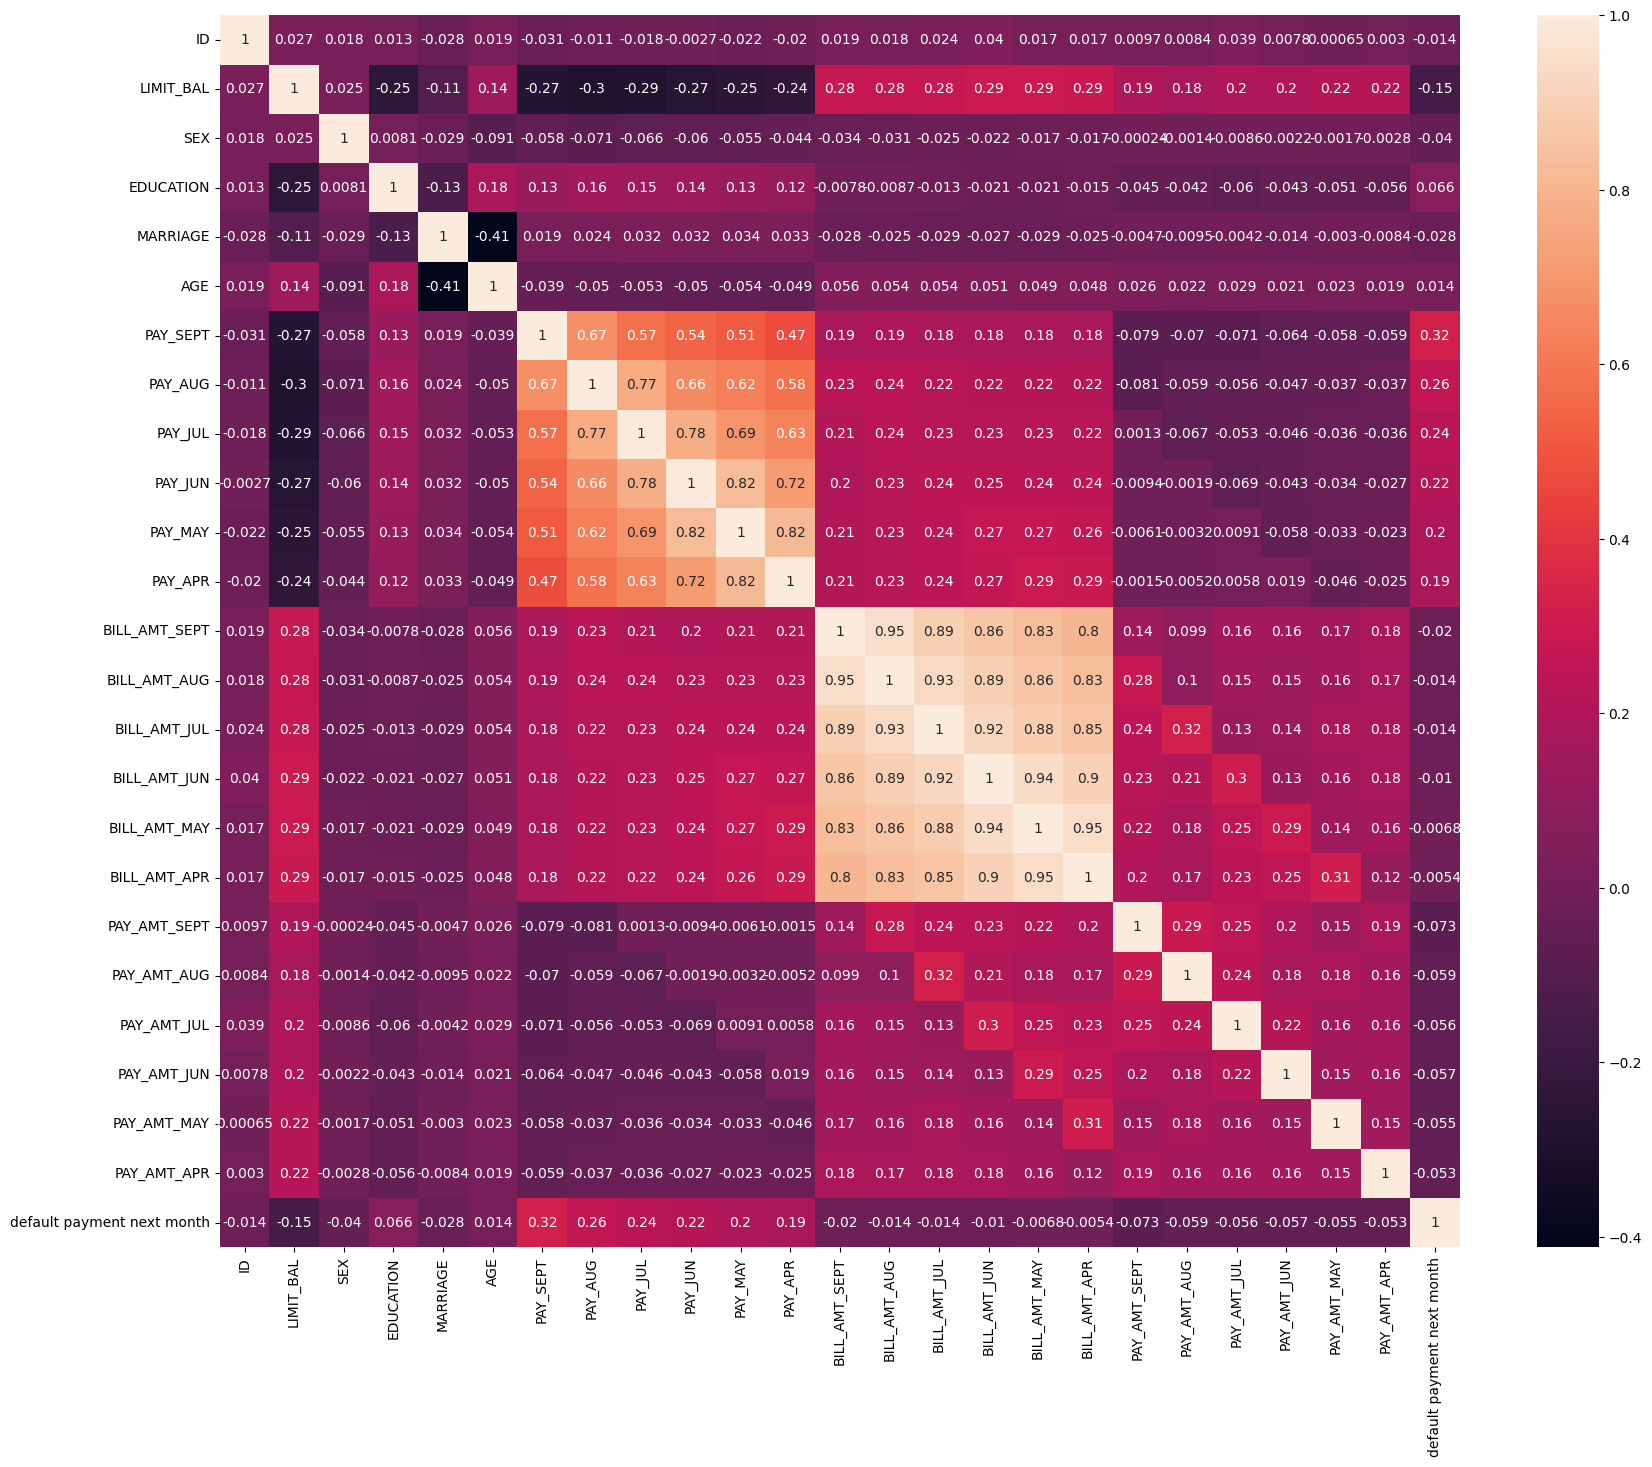

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

#  Correlation matrix
cor = df.corr()

#Plotting Heatmap
plt.figure(figsize =( 20,16))
sns.heatmap(cor, annot=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df_fr = balance_df.copy()

In [ ]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

df_fr.groupby('default payment next month')['Payement_Value'].mean()

default payment next month
0   -1.980140
1    1.652799
Name: Payement_Value, dtype: float64

<Axes: xlabel='default payment next month', ylabel='Payement_Value'>

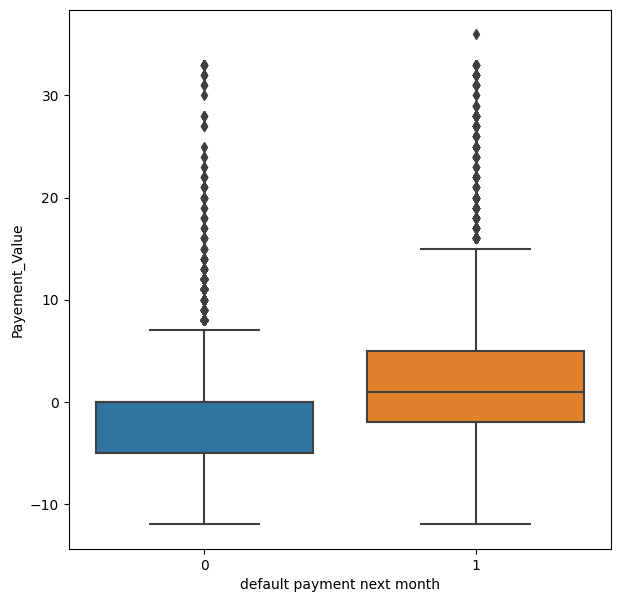

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data = df_fr, x = 'default payment next month', y = 'Payement_Value' )

In [ ]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [ ]:
df_fr.groupby('default payment next month')['Dues'].mean()

default payment next month
0    187742.051532
1    194107.622368
Name: Dues, dtype: float64

In [ ]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [ ]:
print(df_fr['EDUCATION'].unique())
print(df_fr['MARRIAGE'].unique())

[2 1 3 4]
[1 2 3]


In [ ]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_fr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,46728.0,14908.246255,8449.874930,1.0,7665.75,14896.0,22117.25,30000.0
LIMIT_BAL,46728.0,153904.762764,125672.411283,10000.0,50000.00,120000.0,220000.00,800000.0
AGE,46728.0,35.419342,8.817960,21.0,28.00,34.0,41.00,79.0
PAY_SEPT,46728.0,0.168079,1.117509,-2.0,0.00,0.0,1.00,8.0
PAY_AUG,46728.0,0.040254,1.212758,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,46728.0,-0.014638,1.205437,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,46728.0,-0.072291,1.201541,-2.0,-1.00,0.0,0.00,8.0
PAY_MAY,46728.0,-0.124486,1.167421,-2.0,-1.00,0.0,0.00,8.0
PAY_APR,46728.0,-0.160589,1.178641,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT_SEPT,46728.0,49992.186184,73142.263369,-165580.0,3298.50,21274.5,63899.25,964511.0


In [ ]:
df_fr.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,Payement_Value,Dues
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620
5,6,50000.0,MALE,graduate school,single,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,173273
6,7,500000.0,MALE,graduate school,single,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0,2131813


##### What all feature selection methods have you used  and why?

I have used **"correlation cofficient"**.

Because Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

##### Which all features you found important and why?

We got all the details about the columns and rows .

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO  the data is already transformed.

In [ ]:
# Transform Your data

### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled

##### Which method have you used to scale you data and why?

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**No i  don't think that dimensionality reduction is needed.**

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
df_fr = pd.get_dummies(df_fr, columns=['EDUCATION','MARRIAGE'])

In [ ]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [ ]:
df_fr.drop('ID',axis = 1, inplace = True)

In [ ]:
df_fr.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.0,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_fr.shape

(46728, 83)

## LOGISTIC REGRESSION

In [ ]:
df_log_reg = df_fr.copy()

In [ ]:
X = df_log_reg.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_log_reg['default payment next month']

In [ ]:
columns = X.columns

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

0.7528029472268325

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

##### What data splitting ratio have you used and why?

**80 to 20 ratio is used . Because it gives most efficient result.**

## ***7. ML Model Implementation***

### ML Model - 1

 # MODEL EVALUATION

In [ ]:
# Get the accuracy scores


# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)



The accuracy on train data is  0.7542402657552624
The accuracy on test data is  0.7511186045003566


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7511186045003566
The precision on test data is  0.6869001297016861
The recall on test data is  0.7880952380952381
The f1 on test data is  0.734026334026334
The roc_score on test data is  0.7553279316553653


CONFUSION MATRIX

[[12811  2842]
 [ 4852 10802]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

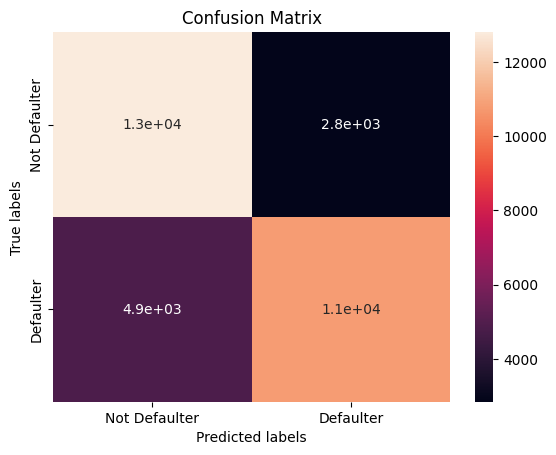

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

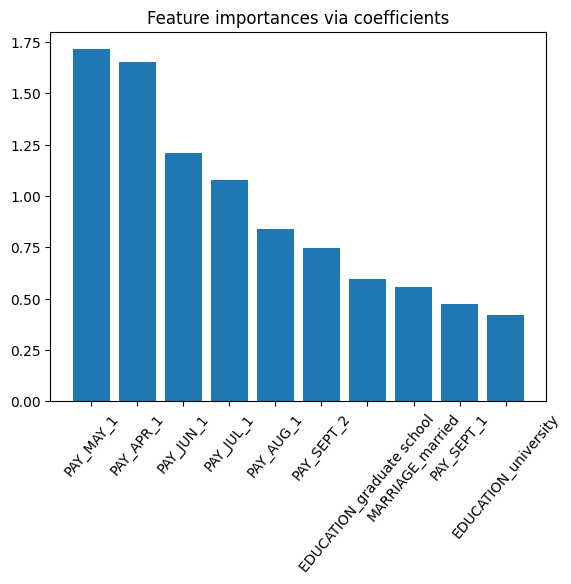

In [ ]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=50)
plt.title("Feature importances via coefficients")
plt.show()

ROC AUC curve

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

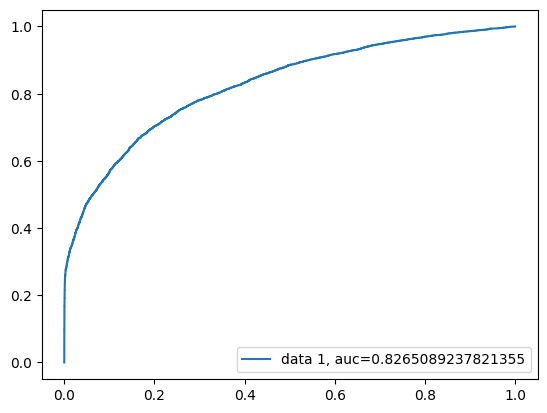

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing SVC

In [ ]:
# Parameter Range
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

In [ ]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
optimal_SVC_clf = grid_clf.best_estimator_

In [ ]:


grid_clf.best_params_



{'C': 10, 'kernel': 'rbf'}

In [ ]:
grid_clf.best_score_

0.7762482790732926

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7542402657552624
The accuracy on test data is  0.7511186045003566


In [ ]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7776408793204073
The precision on test data is  0.7127107652399481
The recall on test data is  0.8190490386048591
The f1 on test data is  0.7621887786947776
The roc_score on test data is  0.7824010114971036


[[13698  1955]
 [ 3996 11658]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

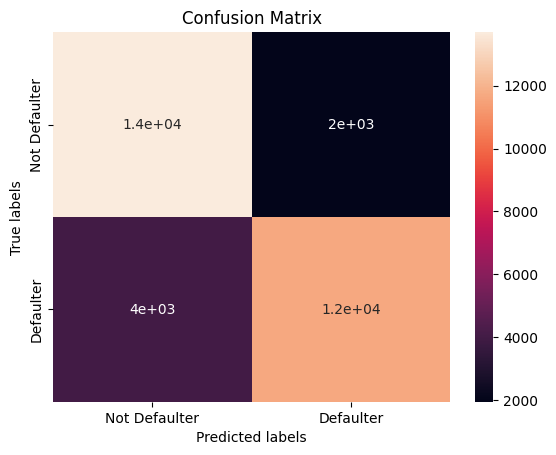

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

ROC AUC curve

In [ ]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

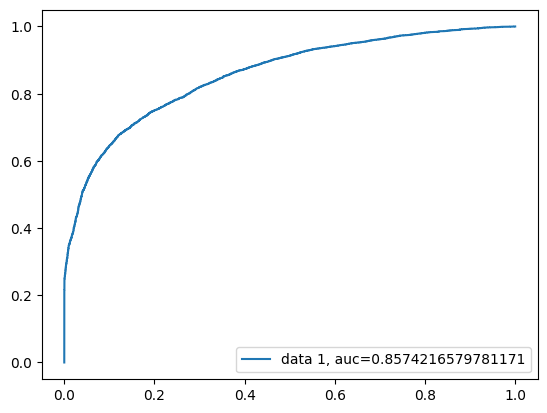

In [ ]:


# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



# DECISIONTREE

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_DTC_clf.best_score_

0.7178584426556825

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7177628006516115
The accuracy on test data is  0.7164904999675766


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

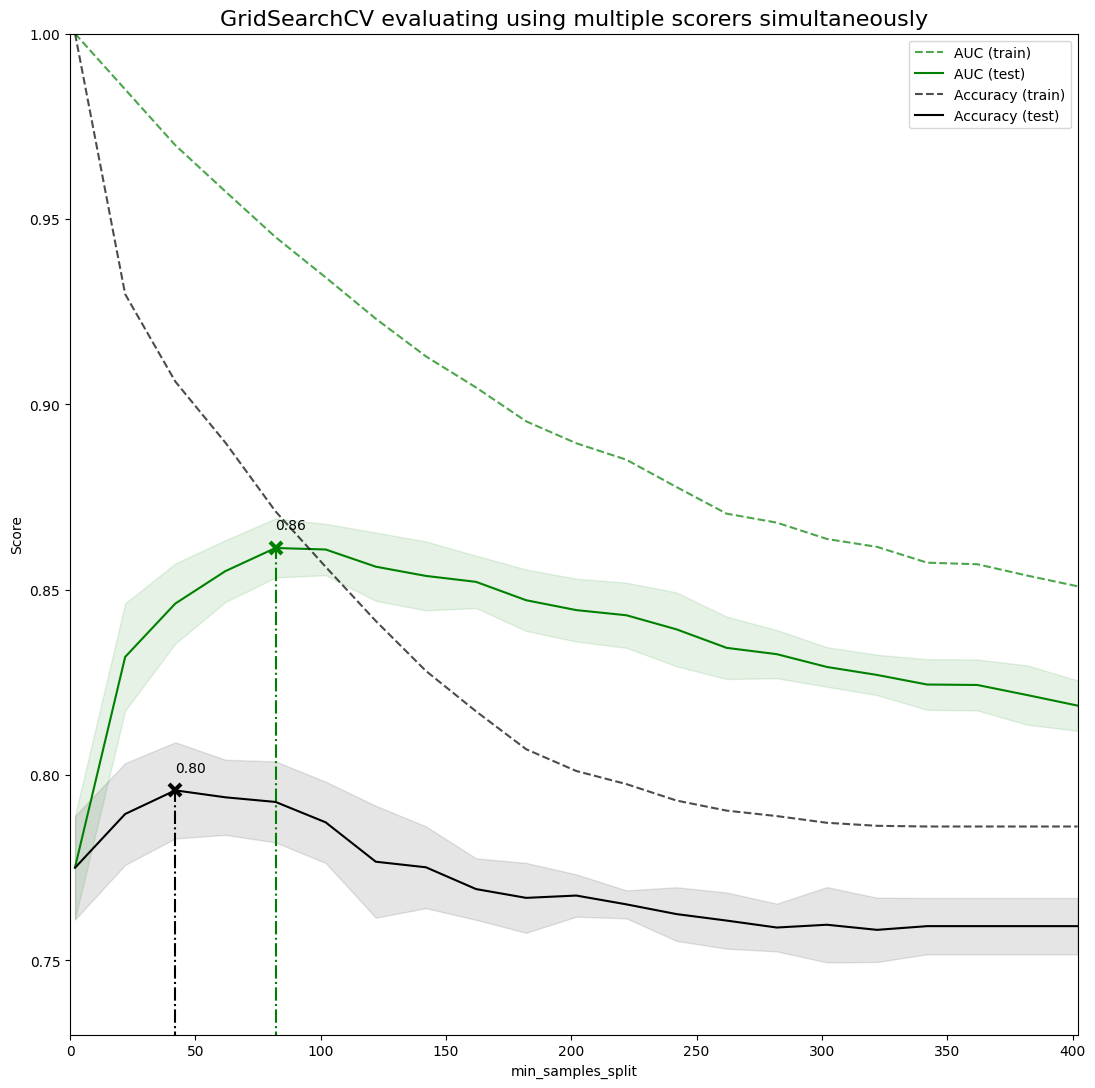

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
                 )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# predict the model

# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)
# Prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(y_test, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(y_test, preds_5), 3)}')



Accuracy on Model 1: 0.741
Accuracy on Model 2: 0.744
Accuracy on Model 3: 0.744
Accuracy on Model 4: 0.742
Accuracy on Model 5: 0.74


##### Which hyperparameter optimization technique have you used and why?

**I have used GINI INDEX .Because it gives the best and the most prominent result for decisiontree**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes i have seen the improvement. The improvement in the metric score is shown as **

Accuracy on Model 1: 0.745

Accuracy on Model 2: 0.744

Accuracy on Model 3: 0.744

Accuracy on Model 4: 0.747

Accuracy on Model 5: 0.744



### ML Model - 2
#RANDOMFOREST

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9992653400198038
The accuracy on test data is  0.8331496011931782


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8331496011931782
The precision on test data is  0.8005188067444877
The recall on test data is  0.8563896212016096
The f1 on test data is  0.8275122343634779
The roc_score on test data is  0.834574162926103


**We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad**

In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.8194334705299662

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:


optimal_rf_clf = grid_rf_clf.best_estimator_



In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9987542722074936
The accuracy on test data is  0.8358731599766552


In [ ]:


test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)



The accuracy on test data is  0.8358731599766552
The precision on test data is  0.8060959792477302
The recall on test data is  0.8571231554268377
The f1 on test data is  0.8308268163892788
The roc_score on test data is  0.8370683096595631


In [ ]:
len(optimal_rf_clf.feature_importances_)

80

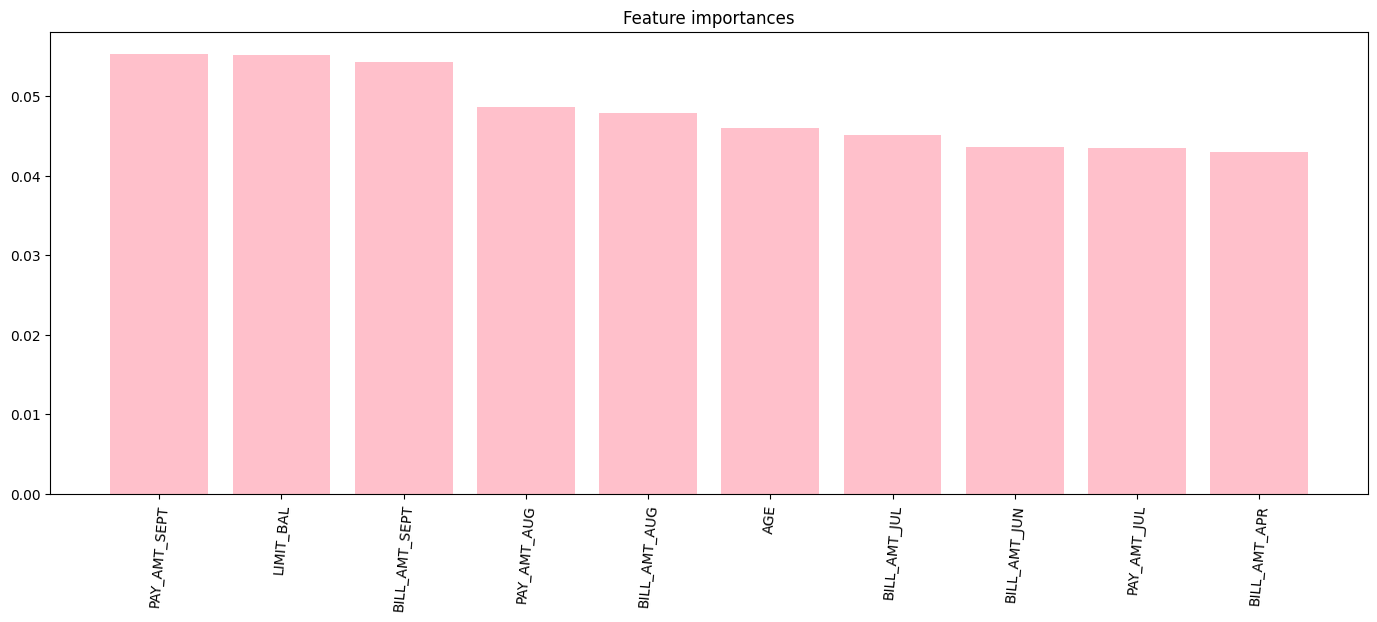

In [ ]:
# Visualizing evaluation Metric Score chart
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

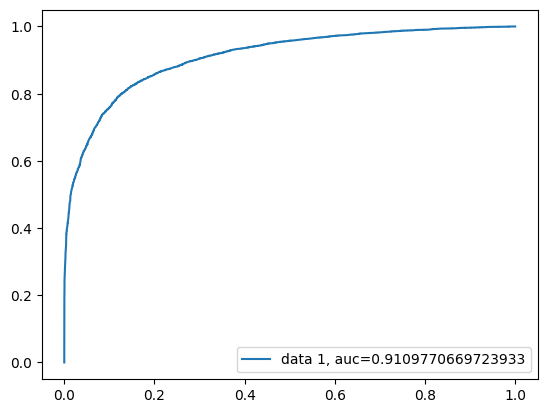

In [ ]:

y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



##### Which hyperparameter optimization technique have you used and why?

**I have used gridsearchcv because it gives very efficient result.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes**

The accuracy on test data is  0.8349004604111276

The precision on test data is  0.803242542153048

The recall on test data is  0.857518692882858

The f1 on test data is  0.829493704795071

The roc_score on test data is  0.8362480645777871

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model -3
#XGBOOST


In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
import lightgbm as lgb
import xgboost as xgb

In [ ]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

[17:17:43] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=9, microseconds=229934)

In [ ]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [ ]:
len(train_class_preds_probs)

31307

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]

array([0.2544854 , 0.22675635, 0.39961913, 0.20116471, 0.2538631 ,
       0.264148  , 0.18411545, 0.37806556, 0.61006355, 0.2970418 ,
       0.96324676, 0.37697774, 0.8305468 , 0.5302105 , 0.93493426,
       0.27788207, 0.96324676, 0.49407983, 0.96324676, 0.25017676],
      dtype=float32)

In [ ]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
len(y_train)

31307

In [ ]:
len(train_class_preds)

31307

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7863417127160061
The accuracy on test data is  0.7716101420141366


In [ ]:


test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)



The accuracy on test data is  0.7716101420141366
The precision on test data is  0.7002594033722438
The recall on test data is  0.8167927382753404
The f1 on test data is  0.7540502793296089
The roc_score on train data is  0.7772534795678143


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# **Hyperparameter Tuning**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

In [ ]:
gsearch1.best_score_

In [ ]:
optimal_xgb = gsearch1.best_estimator_optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

In [ ]:
pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]

In [ ]:


# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="r",  align="center")
# plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()



In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Evaluating the models

In [ ]:
recall_score

In [ ]:


classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]



In [ ]:


pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })



# **Plotting ROC AUC for all the models**

In [ ]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
               (optimal_rf_clf, y_preds_proba_rf),
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GRIDSEARCHCV ,An automated version of manual search hyperparameter optimisation is what Grid Seach is. GridSearchCV is an implementation that comes with the Scikit-Learn framework. Although GridSearch requires several lines of code to implement, it is computationally inefficient due to the length of time required to optimise it.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


**YES THE IMPROVEMENT CAN BE SEEN AS IT IS ALSO SEEN IN THE METRIC SCORES**

The accuracy on test data is  0.829258802931068

The precision on test data is  0.788586251621271

The recall on test data is  0.8583933361569956

The f1 on test data is  0.8220104103292099

The roc_score on train data is  0.8314514054255834

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**XGBOOST**, BECAUSE it   has the  best evaluation metrics  and recall balance .

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**XGBOOST**
Because it has  the best precision and recall balance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have used DECISIONTREE ,RANDOMFOREST AND XGBOOST.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

▶ After performing the various model we the get the best accuracy form the Random forest and XGBoost classifier.

▶ Logestic Regression is the least accurate as compared to other models performed.

▶ XGBoost has the best precision and the recall balance.

▶ Higher recall can be achieved if low precision is acceptable.

▶ We can deploy the model and can be served as an aid to human decision.

▶ Model can be improved with more data and computational resources

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***